# Entrega 1: Ciencia de datos II

Angely Juliana Correa Ríos

Universidad Autónoma Latinoamericana

Semestre I - 2025

#### Limpieza de datos

In [228]:
import pandas as pd

# Cargar los datos
file_path = r"C:\Users\angel\OneDrive - Universidad Autónoma Latinoamericana\ECONOMIA UNAULA\Semestre IX\Ciencia de Datos II\flavors_of_cacao.csv"

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(file_path)

In [229]:
# Vista rápida

#Primeras 5 filas del df
print(df.head())
#Resumen estructura del df
print(df.info())
#Estadisticas descriptivas para columnas numéricas
print(df.describe())

# Identificar valores faltantes
print(df.isnull().sum())

# Revisar categorías de las variables categóricas
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")


  Company \n(Maker-if known) Specific Bean Origin\nor Bar Name   REF  \
0                   A. Morin                       Agua Grande  1876   
1                   A. Morin                             Kpime  1676   
2                   A. Morin                            Atsane  1676   
3                   A. Morin                             Akata  1680   
4                   A. Morin                            Quilla  1704   

   Review\nDate Cocoa\nPercent Company\nLocation  Rating Bean\nType  \
0          2016            63%            France    3.75              
1          2015            70%            France    2.75              
2          2015            70%            France    3.00              
3          2015            70%            France    3.50              
4          2015            70%            France    3.50              

  Broad Bean\nOrigin  
0           Sao Tome  
1               Togo  
2               Togo  
3               Togo  
4               Peru  
<c

In [230]:
df.columns = df.columns.str.strip()


In [231]:
#Limpieza de nombres de columnas
df.columns = [col.replace("\n", " ").strip() for col in df.columns]

df.columns = df.columns.str.strip()  # Elimina espacios antes y después de los nombres
df.columns = df.columns.str.replace("\n", "", regex=True)  # Elimina saltos de línea
df.columns = df.columns.str.replace("\s+", " ", regex=True)  # Reemplaza múltiples espacios por uno solo





<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\angel\AppData\Local\Temp\ipykernel_29140\920874003.py:6: SyntaxWarning: invalid escape sequence '\s'
  df.columns = df.columns.str.replace("\s+", " ", regex=True)  # Reemplaza múltiples espacios por uno solo


In [232]:
df.rename(columns={"Company  (Maker-if known)": "Company"}, inplace=True)


In [233]:
df.rename(columns={"Company (Maker-if known)": "Company"}, inplace=True)


In [234]:
print(df.head())


    Company Specific Bean Origin or Bar Name   REF  Review Date Cocoa Percent  \
0  A. Morin                      Agua Grande  1876         2016           63%   
1  A. Morin                            Kpime  1676         2015           70%   
2  A. Morin                           Atsane  1676         2015           70%   
3  A. Morin                            Akata  1680         2015           70%   
4  A. Morin                           Quilla  1704         2015           70%   

  Company Location  Rating Bean Type Broad Bean Origin  
0           France    3.75                    Sao Tome  
1           France    2.75                        Togo  
2           France    3.00                        Togo  
3           France    3.50                        Togo  
4           France    3.50                        Peru  


In [235]:
# Conversión de columna "Cocoa Percent" a dato numérico
df['Cocoa Percent'] = df['Cocoa Percent'].str.replace('%', '').astype(float) / 100

In [236]:
#Identificación de datos nulos
print(df.isnull().sum())

Company                             0
Specific Bean Origin or Bar Name    0
REF                                 0
Review Date                         0
Cocoa Percent                       0
Company Location                    0
Rating                              0
Bean Type                           1
Broad Bean Origin                   1
dtype: int64


In [237]:
#Eliminar filas con datos nulos
df = df.dropna()


In [238]:
#Rev. datos nulos
print(df.isnull().sum())

Company                             0
Specific Bean Origin or Bar Name    0
REF                                 0
Review Date                         0
Cocoa Percent                       0
Company Location                    0
Rating                              0
Bean Type                           0
Broad Bean Origin                   0
dtype: int64


##### Mini-EDA

In [239]:
#Tipos de datos
print("\nInformación general del DataFrame:")
df.info()


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 1793 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company                           1793 non-null   object 
 1   Specific Bean Origin or Bar Name  1793 non-null   object 
 2   REF                               1793 non-null   int64  
 3   Review Date                       1793 non-null   int64  
 4   Cocoa Percent                     1793 non-null   float64
 5   Company Location                  1793 non-null   object 
 6   Rating                            1793 non-null   float64
 7   Bean Type                         1793 non-null   object 
 8   Broad Bean Origin                 1793 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 140.1+ KB


In [240]:
# Estadísticas generales
print(df.describe())

               REF  Review Date  Cocoa Percent       Rating
count  1793.000000  1793.000000    1793.000000  1793.000000
mean   1036.126046  2012.326269       0.716991     3.185862
std     553.128742     2.928666       0.063265     0.477668
min       5.000000  2006.000000       0.420000     1.000000
25%     576.000000  2010.000000       0.700000     3.000000
50%    1073.000000  2013.000000       0.700000     3.250000
75%    1502.000000  2015.000000       0.750000     3.500000
max    1952.000000  2017.000000       1.000000     5.000000


##### Análisis univariado

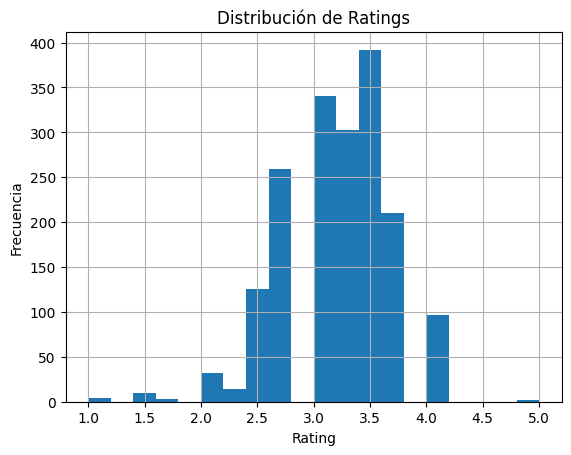

In [241]:
#Análisis univariado: Rating (Reseñas)

import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para ver la distribución
df["Rating"].hist(bins=20)
plt.title("Distribución de Ratings")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()


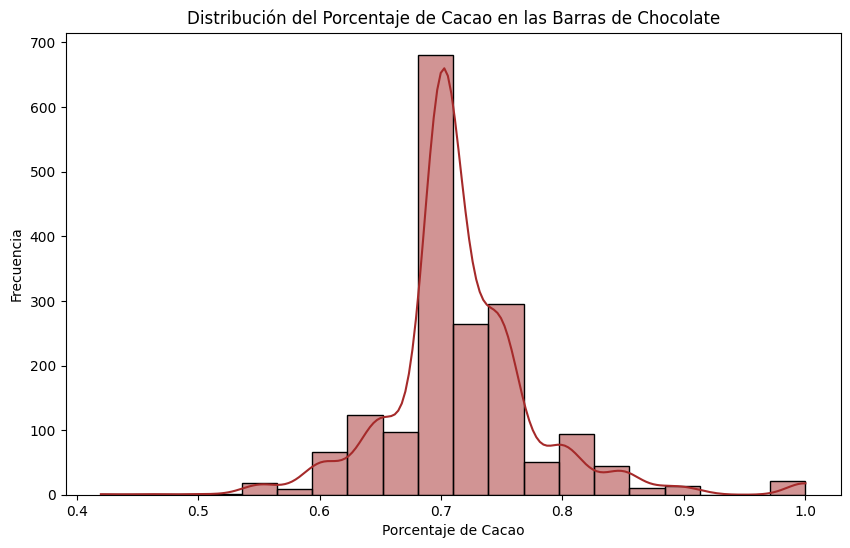

In [242]:
# Análisis Porcentaje de Cacao

# Histograma
plt.figure(figsize=(10,6))
sns.histplot(df["Cocoa Percent"], bins=20, kde=True, color="brown")
plt.title("Distribución del Porcentaje de Cacao en las Barras de Chocolate")
plt.xlabel("Porcentaje de Cacao")
plt.ylabel("Frecuencia")
plt.show()

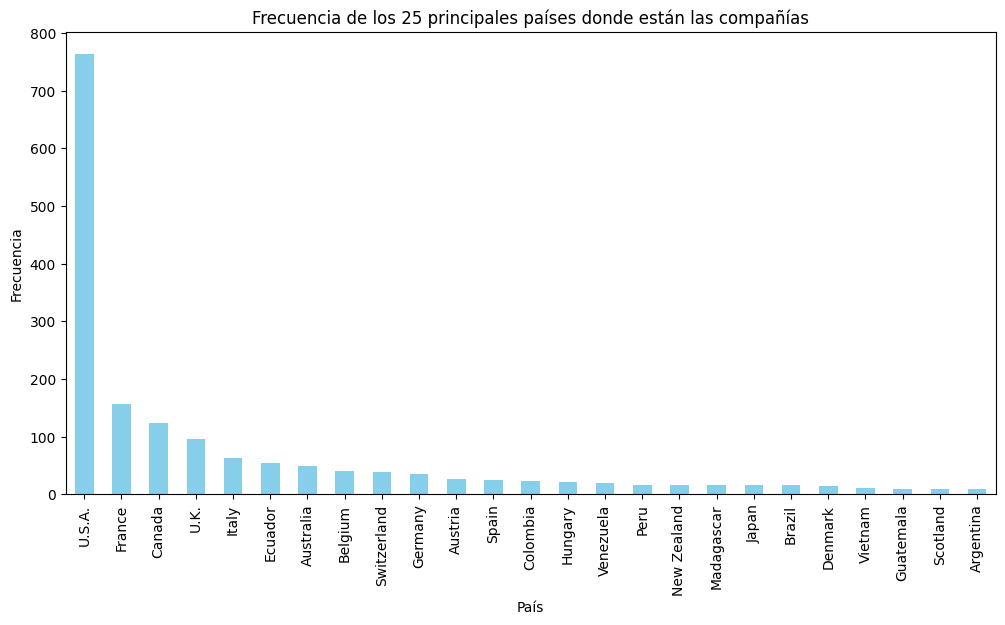

In [243]:
#Análisis variables categóricas: País donde esta ubicado la compañía

# Contar valores únicos y seleccionar los 25 más frecuentes
top_25 = df["Company Location"].value_counts().nlargest(25)

# Gráfico de barras con los 25 principales
plt.figure(figsize=(12,6))
top_25.plot(kind="bar", color="skyblue")
plt.title("Frecuencia de los 25 principales países donde están las compañías")
plt.xlabel("País")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)  # Rotar etiquetas para mejor visibilidad
plt.show()


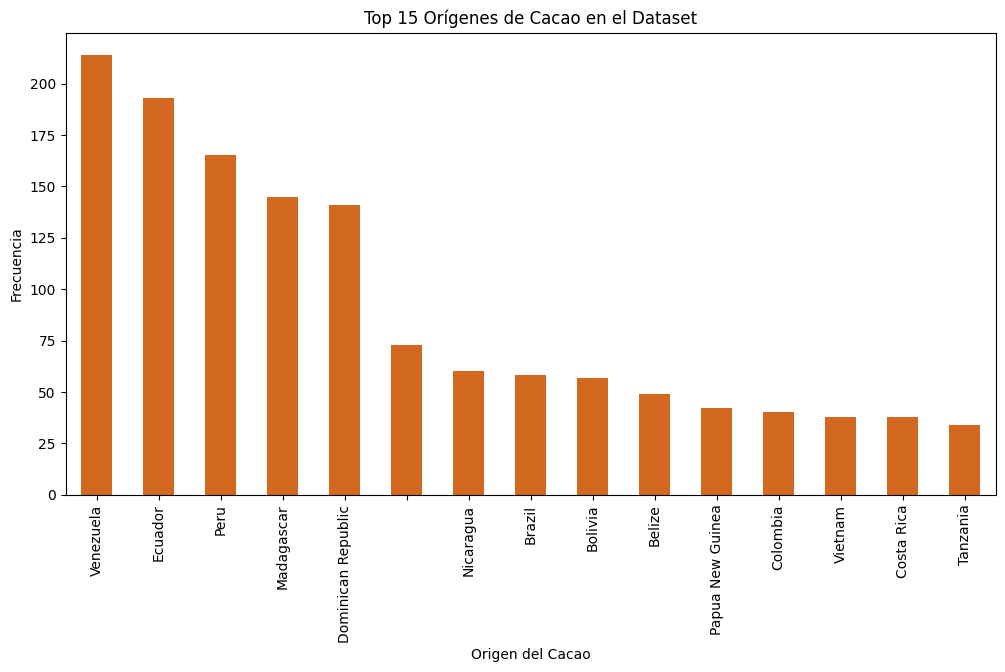

In [244]:
#Análisis Origen del cacao
# Contar valores únicos y seleccionar los 15 más frecuentes
top_15_beans = df["Broad Bean Origin"].value_counts().nlargest(15)

# Gráfico de barras
plt.figure(figsize=(12,6))
top_15_beans.plot(kind="bar", color="chocolate")
plt.title("Top 15 Orígenes de Cacao en el Dataset")
plt.xlabel("Origen del Cacao")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()


##### Análisis Bivariado

In [245]:
#Relación entre el porcentaje de cacao y los ratings
correlation = df["Cocoa Percent"].corr(df["Rating"])
print("Correlación entre Porcentaje de Cacao y Rating:", correlation)


Correlación entre Porcentaje de Cacao y Rating: -0.1647583175456277


Broad Bean Origin
Guat., D.R., Peru, Mad., PNG    4.00
Gre., PNG, Haw., Haiti, Mad     4.00
Dom. Rep., Madagascar           4.00
Venezuela, Java                 4.00
Peru, Dom. Rep                  4.00
Dominican Rep., Bali            3.75
DR, Ecuador, Peru               3.75
PNG, Vanuatu, Mad               3.75
Peru, Belize                    3.75
Ven.,Ecu.,Peru,Nic.             3.75
Name: Rating, dtype: float64


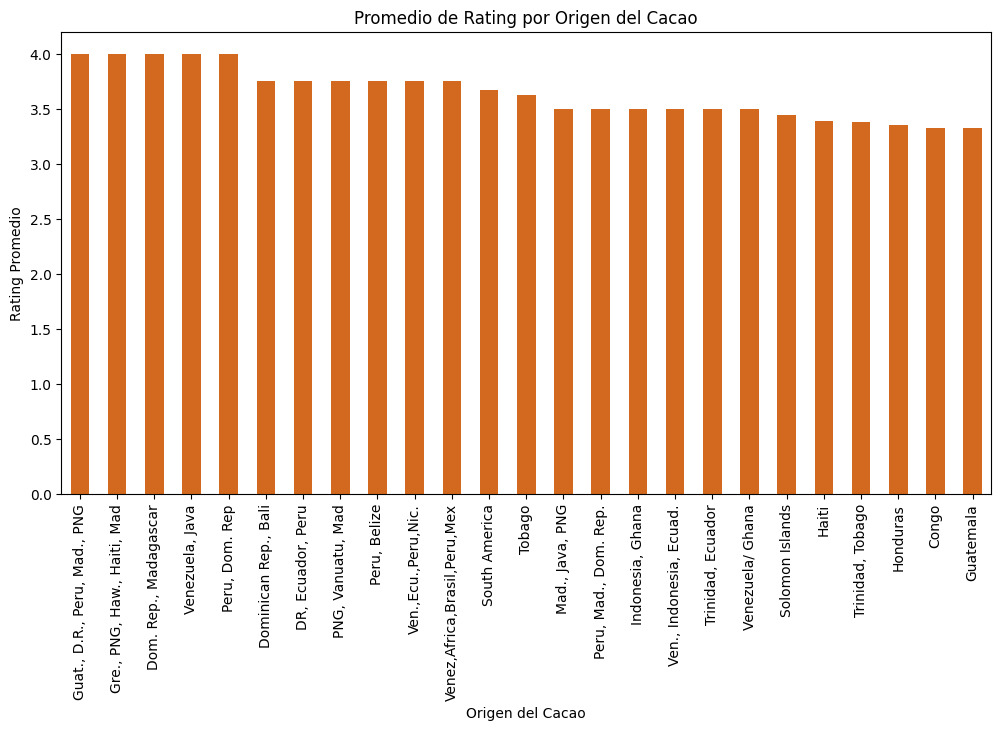

In [246]:
#Relación entre los ratings y los origenes del cacao
import pandas as pd

# Agrupar por 'Broad Bean Origin' y calcular el promedio de rating
origin_ratings = df.groupby("Broad Bean Origin")["Rating"].mean().sort_values(ascending=False)

# Mostrar los 10 orígenes con mejor rating promedio
print(origin_ratings.head(10))

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
origin_ratings.head(25).plot(kind="bar", color="chocolate")  # Mostramos los 25 primeros
plt.title("Promedio de Rating por Origen del Cacao")
plt.xlabel("Origen del Cacao")
plt.ylabel("Rating Promedio")
plt.xticks(rotation=90)
plt.show()


In [247]:
print(df.columns)


Index(['Company', 'Specific Bean Origin or Bar Name', 'REF', 'Review Date',
       'Cocoa Percent', 'Company Location', 'Rating', 'Bean Type',
       'Broad Bean Origin'],
      dtype='object')


In [248]:
print(df.head())


    Company Specific Bean Origin or Bar Name   REF  Review Date  \
0  A. Morin                      Agua Grande  1876         2016   
1  A. Morin                            Kpime  1676         2015   
2  A. Morin                           Atsane  1676         2015   
3  A. Morin                            Akata  1680         2015   
4  A. Morin                           Quilla  1704         2015   

   Cocoa Percent Company Location  Rating Bean Type Broad Bean Origin  
0           0.63           France    3.75                    Sao Tome  
1           0.70           France    2.75                        Togo  
2           0.70           France    3.00                        Togo  
3           0.70           France    3.50                        Togo  
4           0.70           France    3.50                        Peru  


In [249]:
#Relación entre la compañía y los ratings

# Agrupar por compañía y calcular el promedio de rating
company_ratings = df.groupby("Company")["Rating"].mean().sort_values(ascending=False)

# Mostrar las 10 compañías con mejor rating promedio
print(company_ratings.head(10))



Company
Tobago Estate (Pralus)                  4.000000
Ocelot                                  3.875000
Heirloom Cacao Preservation (Zokoko)    3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Un Dimanche A Paris                     3.750000
Chocola'te                              3.750000
Obolo                                   3.750000
Name: Rating, dtype: float64


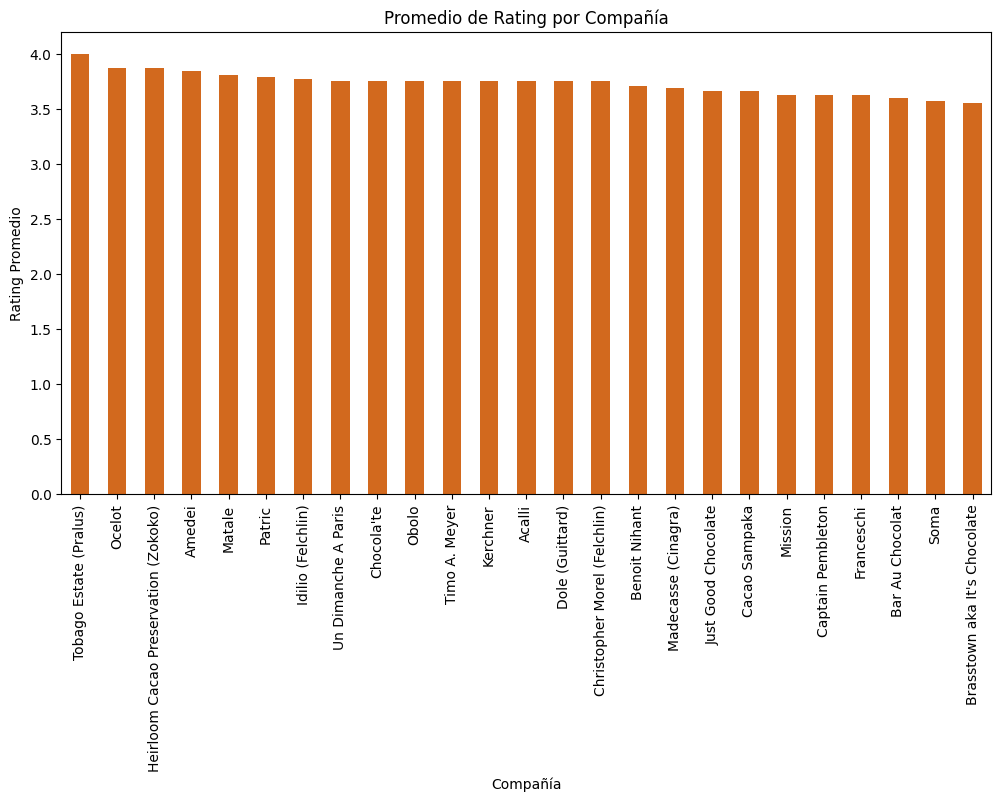

In [250]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
company_ratings.head(25).plot(kind="bar", color="chocolate")  # Mostramos las 25 primeras
plt.title("Promedio de Rating por Compañía")
plt.xlabel("Compañía")
plt.ylabel("Rating Promedio")
plt.xticks(rotation=90)
plt.show()


#### Pipeline de procesamiento

In [251]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [252]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


##### Escalar las variables

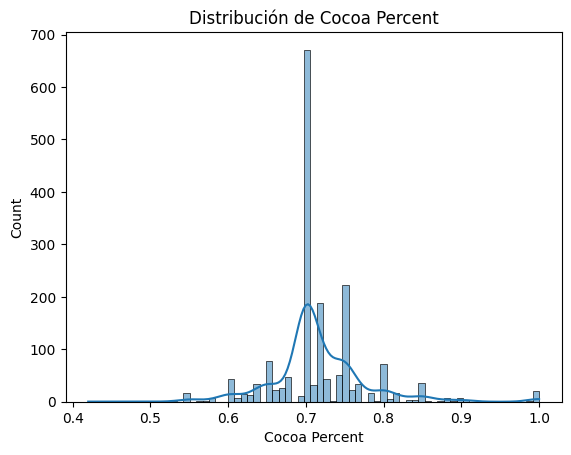

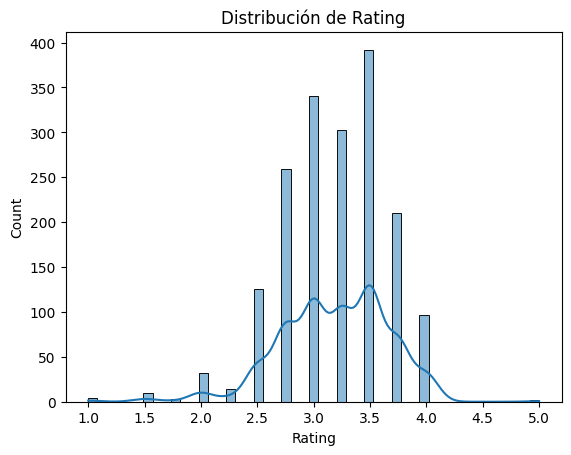

In [253]:
#Verificación de distribución

import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de Cocoa Percent
sns.histplot(df["Cocoa Percent"], kde=True)
plt.title("Distribución de Cocoa Percent")
plt.show()

# Distribución de Rating
sns.histplot(df["Rating"], kde=True)
plt.title("Distribución de Rating")
plt.show()


In [254]:
print(df.head())

    Company Specific Bean Origin or Bar Name   REF  Review Date  \
0  A. Morin                      Agua Grande  1876         2016   
1  A. Morin                            Kpime  1676         2015   
2  A. Morin                           Atsane  1676         2015   
3  A. Morin                            Akata  1680         2015   
4  A. Morin                           Quilla  1704         2015   

   Cocoa Percent Company Location  Rating Bean Type Broad Bean Origin  
0           0.63           France    3.75                    Sao Tome  
1           0.70           France    2.75                        Togo  
2           0.70           France    3.00                        Togo  
3           0.70           France    3.50                        Togo  
4           0.70           France    3.50                        Peru  


In [255]:
for col in df.columns:
    print(f"'{col}'")


'Company'
'Specific Bean Origin or Bar Name'
'REF'
'Review Date'
'Cocoa Percent'
'Company Location'
'Rating'
'Bean Type'
'Broad Bean Origin'


In [256]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Identificar variables
num_features = ["Cocoa Percent", "Rating"]  
cat_features = ["Company", "Specific Bean Origin or Bar Name", "Company Location", "Bean Type", "Broad Bean Origin"]  #


In [257]:
# Transformaciones
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown="ignore")


In [258]:

# Preprocesador
preprocessor = ColumnTransformer([
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)
])

In [259]:
# Pipeline final
pipeline = Pipeline([
    ("preprocessor", preprocessor)
])


In [260]:
# Aplicar pipeline
df_transformed = pipeline.fit_transform(df)

In [ ]:
import pandas as pd

df_transformed = pd.DataFrame(df_transformed.toarray())  # Convierte la matriz dispersa
print(df_transformed.head())

In [265]:
# Ver los primeros resultados
print(df_transformed.head())

       0         1     2     3     4     5     6     7     8     9     ...  \
0 -1.375407  1.181356   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1 -0.268644 -0.912734   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2 -0.268644 -0.389211   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3 -0.268644  0.657834   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4 -0.268644  0.657834   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

   1646  1647  1648  1649  1650  1651  1652  1653  1654  1655  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 1656 columns]
